# Importando as bibliotecas

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import spearmanr
%matplotlib inline

# Carregamento de dados

In [39]:
df = pd.read_csv('enron.csv')

##### Verificaremos se os dados carregam corretamente:

##### Os dados de cada coluna demonstram similaridades de formatação; foram __carregados corretamente__.

In [40]:
pd.set_option('display.float_format', '{:.3f}'.format)
df.head(5)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
0,4175000.000,2869717.000,-3081055.000,NaN,phillip.allen@enron.com,1729541.000,13868.000,2195.000,47.000,65.000,...,152.000,False,126027.000,-126027.000,201955.000,1407.000,2902.000,4484442.000,1729541.000,ALLEN PHILLIP K
1,NaN,178980.000,NaN,NaN,NaN,257817.000,3486.000,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.000,257817.000,BADUM JAMES P
2,NaN,NaN,-5104.000,NaN,james.bannantine@enron.com,4046157.000,56301.000,29.000,39.000,0.000,...,864523.000,False,1757552.000,-560222.000,477.000,465.000,566.000,916197.000,5243487.000,BANNANTINE JAMES M
3,1200000.000,1295738.000,-1386055.000,NaN,NaN,6680544.000,11200.000,NaN,NaN,NaN,...,2660303.000,False,3942714.000,NaN,267102.000,NaN,NaN,5634343.000,10623258.000,BAXTER JOHN C
4,400000.000,260455.000,-201641.000,NaN,frank.bay@enron.com,NaN,129142.000,NaN,NaN,NaN,...,69.000,False,145796.000,-82782.000,239671.000,NaN,NaN,827696.000,63014.000,BAY FRANKLIN R


# Análise descritiva de dados


##### A função do data frame Pandas 'shape()' é utilizado para mostrar uma __tupla__, representando o __número__ de __linhas__ no elemento 0 da tupla e o __número__ de __colunas__ no elemento 1 da tupla.

##### Podemos verificar que o resultado foi de 146 linhas e 22 colunas. Desta forma podemos concluir que o número de instâncias é de __146__, no qual apresentam __22__ variáveis.

In [41]:
df.shape

(146, 22)

##### Ao verificarmos o número de __instâncias__ em dataframes separados por __POIs__ e __não-POIs__, verificamos que existem respectivamente __18__ e __128__.

In [42]:
poi_df = df[df['poi'] != False]
non_poi_df = df[df['poi'] == False]

poi_df.shape[0], non_poi_df.shape[0]

(18, 128)

##### Os métodos de cálculo do biblioteca pandas já oferecem certo nível de __sanitização__ de dados. A média total já terá média disponível aplicada aos valores __nulos__.

##### Podemos observar __resultados__ importantes sobre os dados disponibilizados sobre os __indivíduos__, como __média__(mean), __moda__(std), __mediana__(50%) e __quartis__(25%, 50%, 75%):

In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bonus,82.000,2374234.610,10713327.969,70000.000,431250.000,769375.000,1200000.000,97343619.000
deferral_payments,39.000,1642674.154,5161929.974,-102500.000,81573.000,227449.000,1002671.500,32083396.000
deferred_income,49.000,-1140475.143,4025406.379,-27992891.000,-694862.000,-159792.000,-38346.000,-833.000
director_fees,17.000,166804.882,319891.410,3285.000,98784.000,108579.000,113784.000,1398517.000
exercised_stock_options,102.000,5987053.775,31062006.569,3285.000,527886.250,1310813.500,2547724.000,311764000.000
expenses,95.000,108728.916,533534.814,148.000,22614.000,46950.000,79952.500,5235198.000
from_messages,86.000,608.791,1841.034,12.000,22.750,41.000,145.500,14368.000
from_poi_to_this_person,86.000,64.895,86.979,0.000,10.000,35.000,72.250,528.000
from_this_person_to_poi,86.000,41.233,100.073,0.000,1.000,8.000,24.750,609.000
loan_advances,4.000,41962500.000,47083208.702,400000.000,1600000.000,41762500.000,82125000.000,83925000.000


##### Existem variáveis que possuem valores negativos, sendo elas: deferral_payments, deferred_income, restricted_stock, restricted_stock_deferred e total_stock_value. Podemos concluir que estas variáveis representam transações bidirecionais.

##### Também obtemos o resultado da __contagem__ dos dados presentes em cada coluna. A seguir, é calculada a __porcentagem__ de dados disponíveis para cada variável:

In [44]:
df.count()/len(df) *100

bonus                        56.164
deferral_payments            26.712
deferred_income              33.562
director_fees                11.644
email_address                76.027
exercised_stock_options      69.863
expenses                     65.068
from_messages                58.904
from_poi_to_this_person      58.904
from_this_person_to_poi      58.904
loan_advances                 2.740
long_term_incentive          45.205
other                        63.699
poi                         100.000
restricted_stock             75.342
restricted_stock_deferred    12.329
salary                       65.068
shared_receipt_with_poi      58.904
to_messages                  58.904
total_payments               85.616
total_stock_value            86.301
name                        100.000
dtype: float64

##### Isso pode ocorrer por inúmeros motivos, sendo estes motivos, alguma das vezes, com mas intenções. Como este conjunto de dados se trata de uma compilação de informações sobre pessoas que eram parte de uma impressa que faliu devido a má conduta e exploração através de meios ilícitos, devemos sempre ter em mente a questão da falta ou omissão de certos dados.

In [45]:
(df.count()/len(df) *100).mean()

57.72104607721046

##### Posteriormente, verificamos que temos em média apenas __57.7%__ dos campos totais __preenchidos__. Por isso devemos ter cautela na __escolha__ das variáveis a serem verificadas e de que modo iremos __verificá-las__.

##### A seguir, temos a __variância__ de cada uma das variáveis numéricas. A grandeza do valor das variâncias nos indica __dispersão__ dos dados em torno da média, ou seja, provável presença de __outliers__ (valores fora do normal, no qual podem ser deixados de lado para certas análises):

In [46]:
df.select_dtypes(include=['float64']).var()

bonus                        114775396172335.094
deferral_payments             26645521052091.137
deferred_income               16203896512113.125
director_fees                   102330514030.110
exercised_stock_options      964848252082401.750
expenses                        284659397866.120
from_messages                        3389406.003
from_poi_to_this_person                 7565.389
from_this_person_to_poi                10014.628
loan_advances               2216828541666666.750
long_term_incentive           35316388281936.867
other                         21061242250265.094
restricted_stock             156707288526355.625
restricted_stock_deferred     17652554476485.441
salary                         7378661383806.166
shared_receipt_with_poi              1388432.463
to_messages                          6670344.357
total_payments               844583360181500.750
total_stock_value           1517708056259895.750
dtype: float64

##### Logo, obtemos a __moda__ das variáveis __categóricas__ ao contar a quantia de cada valor:
##### POIs totalizam 146 valores, indicando que todos os campos estão preenchidos. Podemos concluir que a moda da coluna "poi" é "False", aparecendo 128 vezes. "True" aparece 18 vezes, desta forma não temos valores únicos.

In [47]:
df['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

##### Na coluna 'email_address', verificamos a existência 111 e-mails únicos. Como sabemos que temos 146 indivíduos no total, podemos concluir que há 35 campos nulos. Desta forma, nossa moda de e-mails é "não preenchido”.

In [48]:
df['email_address'].value_counts(dropna=False)

NaN                         35
phillip.allen@enron.com      1
lou.pai@enron.com            1
jere.overdyke@enron.com      1
cindy.olson@enron.com        1
                            ..
steven.elliott@enron.com     1
john.echols@enron.com        1
w.duran@enron.com            1
jeff.donahue@enron.com       1
scott.yeager@enron.com       1
Name: email_address, Length: 112, dtype: int64

##### Na variável categórica "name", existem 146 nomes únicos. Desta forma não temos moda. 

In [49]:
df['name'].value_counts()

ALLEN PHILLIP K       1
PRENTICE JAMES        1
METTS MARK            1
MEYER JEROME J        1
MEYER ROCKFORD G      1
                     ..
GAHN ROBERT S         1
GARLAND C KEVIN       1
GATHMANN WILLIAM D    1
GIBBS DANA R          1
YEAP SOON             1
Name: name, Length: 146, dtype: int64

_____________________________________________________________

# Análise univariada de dados



##### Para uma análise __univariada quantitativa__, iniciaremos com uma básica observação de uma variável.

#### Bonus:

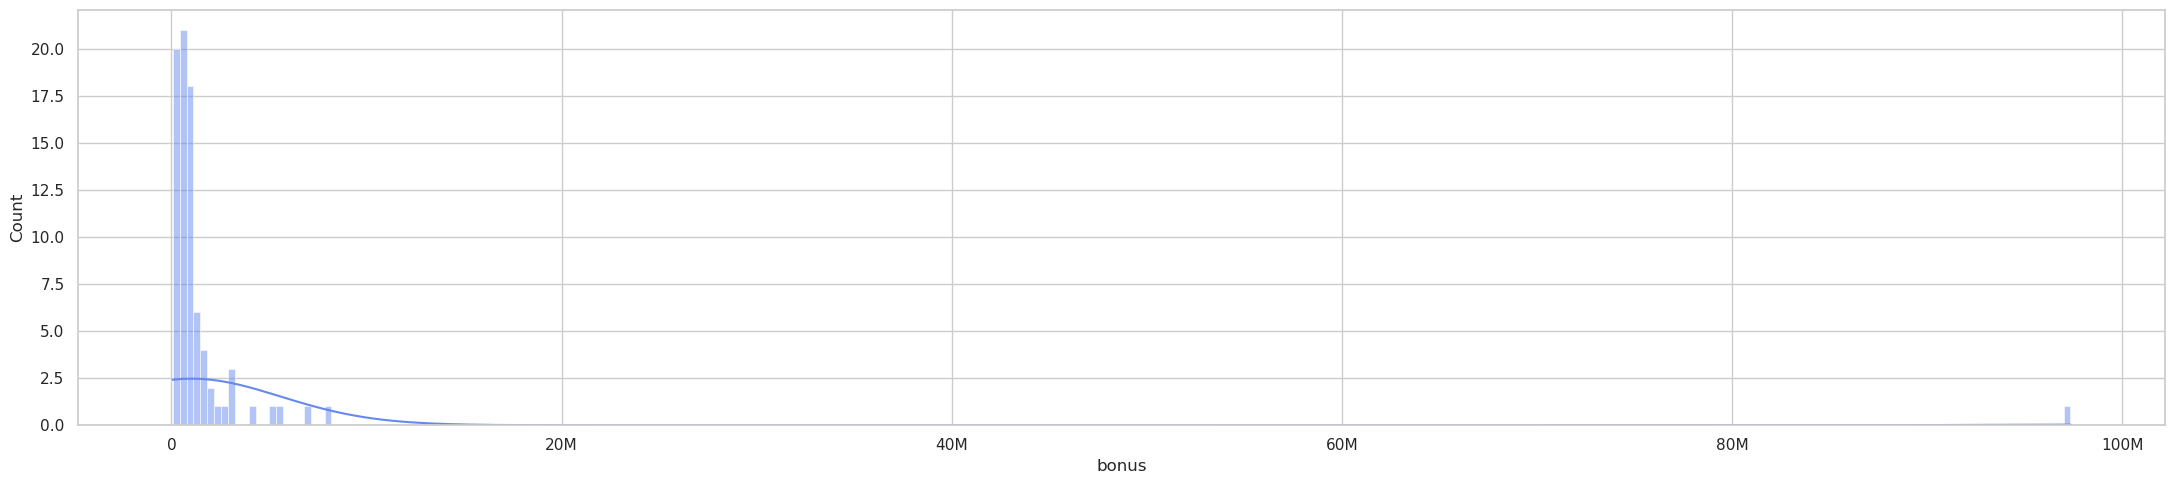

In [50]:
def formatador(x, pos):
    if x == 0:
        return f'{x:.0f}'
    elif -1000 < x < 1000 :
        return f'{x:.0f}'
    elif -1e6 < x < 1e6 :
        return f'{x/1000:.0f}mil'
    else:
        return f'{x/1e6:.0f}M'

formatter = mtick.FuncFormatter(formatador)

sns.set_theme(style="whitegrid", palette="coolwarm")
sns.histplot(x='bonus', data=df, kde=True)
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,10))
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(formatter)

##### O __pico__ da __frequência__ da __quantia__ da variável 'bônus' está muito maior do que o __pico__ da __densidade estimada de núcleo__ (KDE), podemos sugerir que os outliers tem uma __influência significativa__ na estimação da distribuição.

##### Por serem colunas nas quais contém apenas valores únicos e não numéricos, __removemos__ as colunas: e-mail e nome.
##### Verificamos que o outlier representava a linha "TOTAL" dos valores. Para a análise normalizada dos valores únicos __individuais__, removemos a linha.

In [51]:
df = df[df['name'] != "TOTAL"]
df = df.drop(['email_address', 'name'], axis=1)

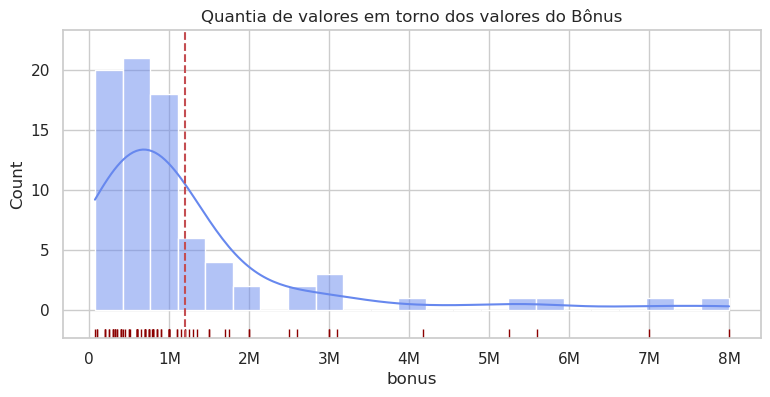

In [52]:
plt.figure(figsize=(9,4))
sns.rugplot(x='bonus', data=df[df['bonus']<0.4e8], height=.03, color='darkred').set_title("Quantia de valores em torno dos valores do Bônus")
sns.histplot(x='bonus', data=df[df['bonus']<0.4e8], kde=True).axvline(x=df['bonus'].mean(), color='r', linestyle='--')
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,10))
plt.gca().xaxis.set_major_formatter(formatter)


##### Ao __limitarmos__ o valor do bônus a um máximo 8 000 000, temos um KDE um pouco mais confiável, com sutis ondulações. A linha vertical vermelha nos mostra o local da média dos valores, certamente distanciada do pico KDE por conta dos valores grandes de baixa frequência.

##### A seguir, com o intuito visualizar o resumo dos cinco números de cada variável, vamos analisar __todas__ as __variáveis numéricas__ em forma de boxplot lado-a-lado. Desta forma poderemos observar como todas as variáveis se comportam e relação a seus próprios outliers.

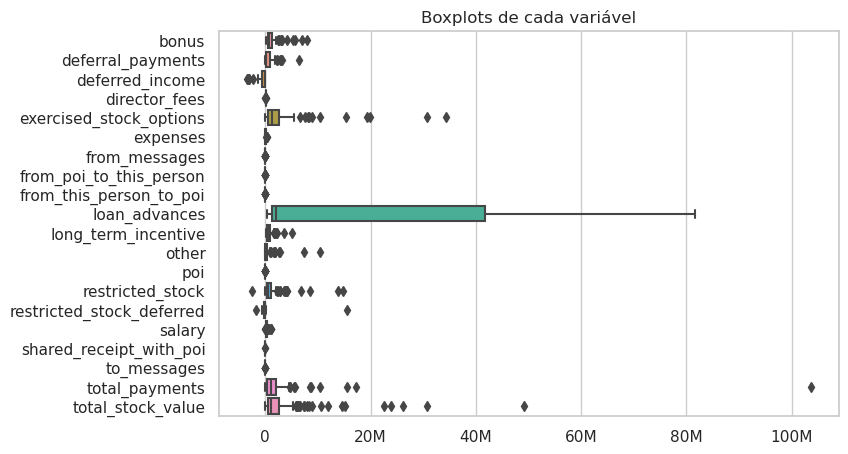

In [53]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.boxplot(df, orient='h').set_title("Boxplots de cada variável")
plt.ticklabel_format(style='plain', axis='x')
sns.set(rc={'figure.figsize':(22,5)})
plt.gca().xaxis.set_major_formatter(formatter)


##### Existem __diversos outliers__. Para melhor visualização, posicionaremos o boxplot na horizontal e __limitaremos__ o __eixo Y__ progressivamente:

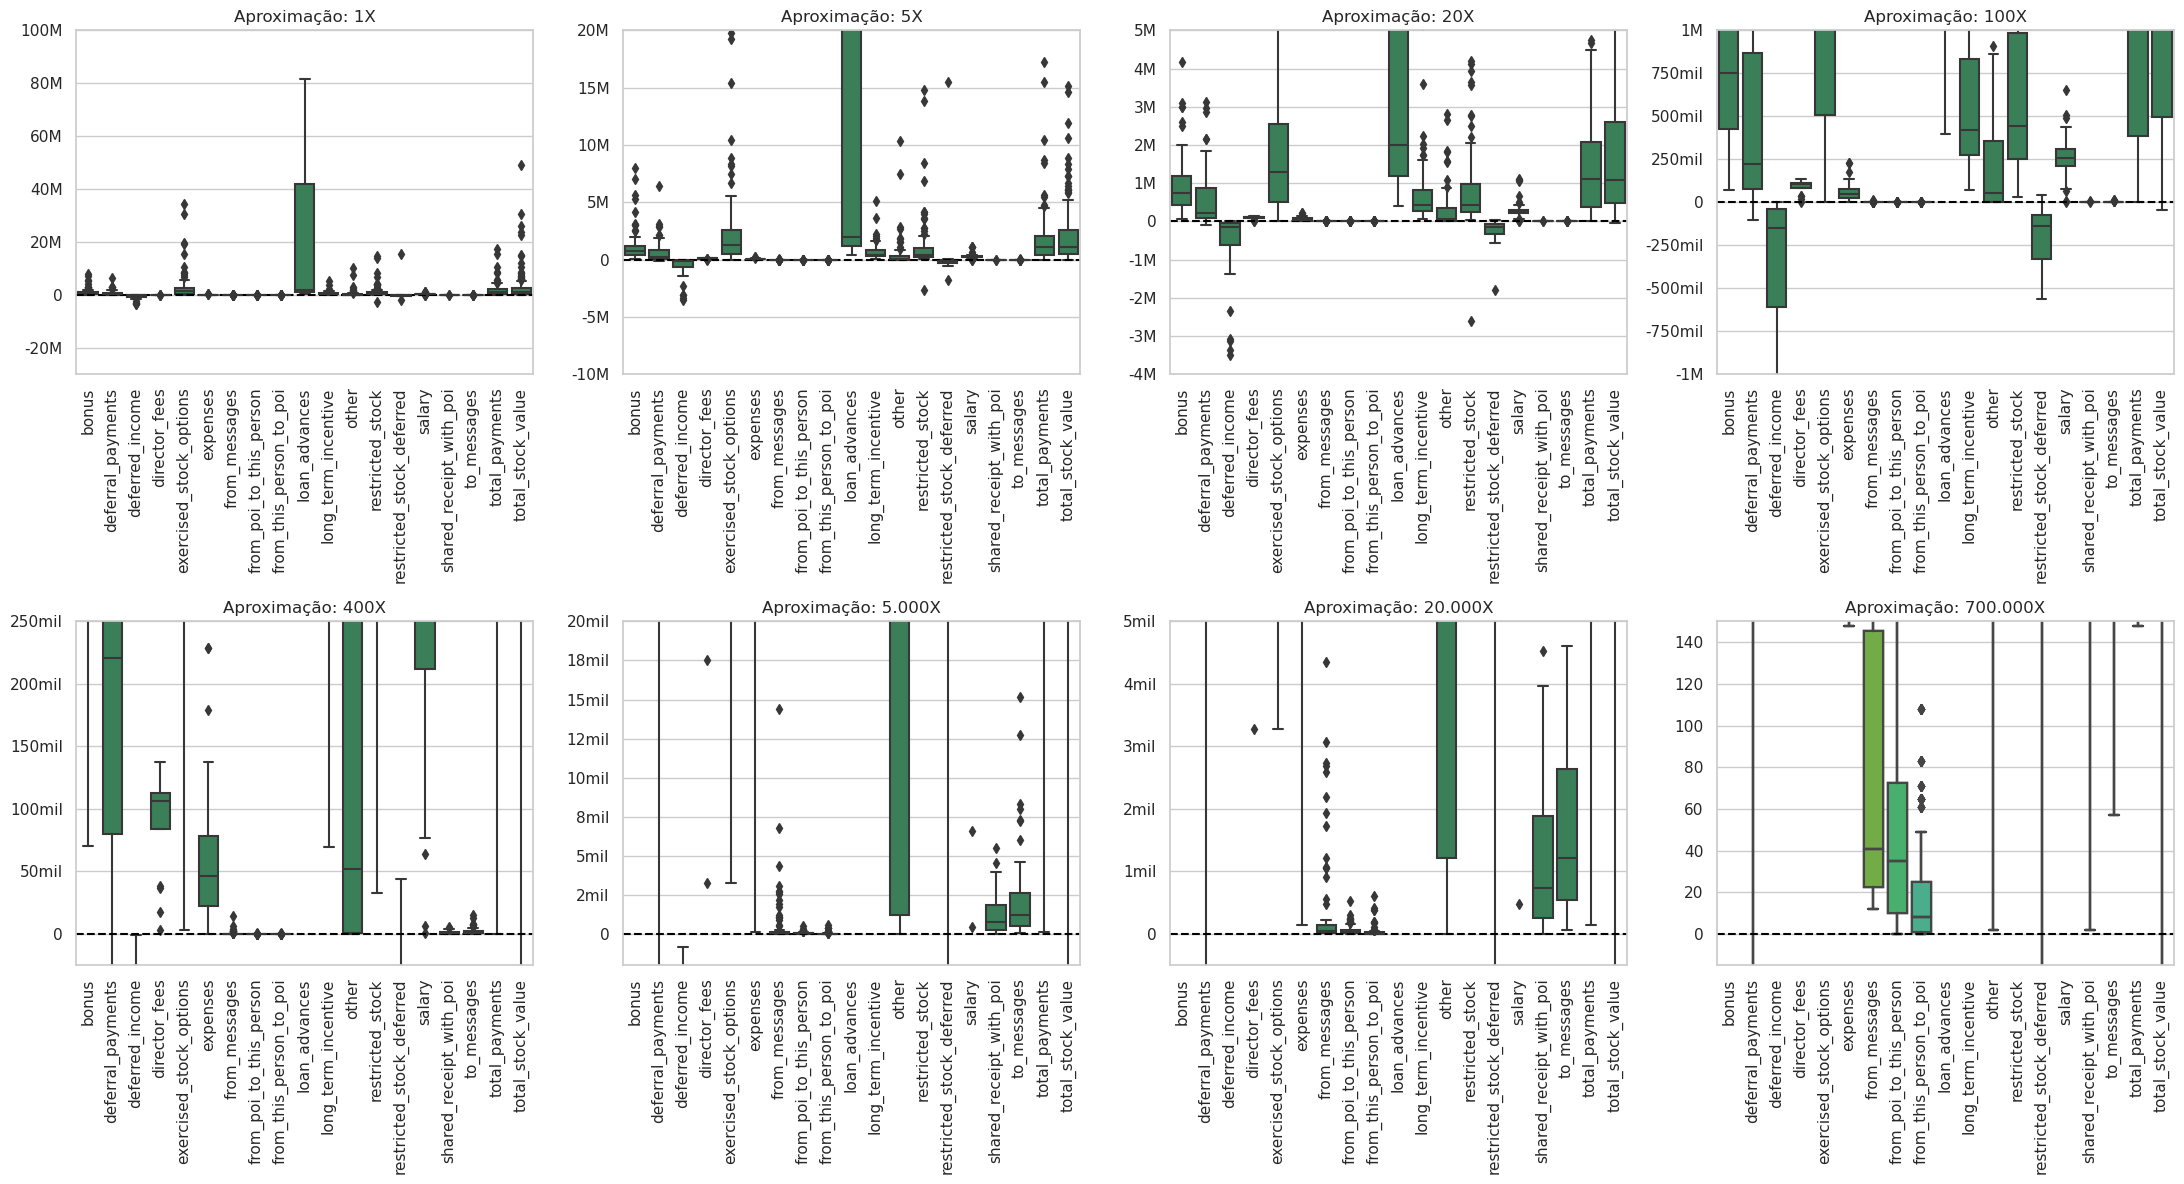

In [54]:
sns.set_style('whitegrid')
this_df = df.drop(['poi'], axis=1)

y_limits = [(-3e7, 1e8), (-1e7, 2e7), (-4e6, 5e6), (-1e6, 1e6),
             (-25000, 250000), (-2000, 20000), (-500, 5000), (-15, 150)]

titles = ['Aproximação: 1X', 'Aproximação: 5X', 'Aproximação: 20X', 'Aproximação: 100X',
           'Aproximação: 400X', 'Aproximação: 5.000X', 'Aproximação: 20.000X', 'Aproximação: 700.000X']

fig, axs = plt.subplots(2, 4, figsize=(22,12))

for i in range(8):
    row = i // 4
    col = i % 4
    sns.boxplot(this_df, ax=axs[row][col], color="seagreen").set_xticklabels(sns.boxplot(this_df).get_xticklabels(), rotation=90)
    axs[row][col].set_title(titles[i])
    axs[row][col].ticklabel_format(style='plain', axis='y')
    axs[row][col].yaxis.set_major_formatter(formatter)
    axs[row][col].set_ylim(y_limits[i])
    axs[row][col].axhline(y=0, color='black', linestyle='--')

plt.tight_layout()
plt.show()

##### Através da grande dissimilaridade, em um todo, entre os boxplots apresentados, podemos averiguar que existem diferenças significativas sobre a grandiozidade das variáveis a serem comparadas.

##### Com as 8 ultimas variações observamos:
1. Existem variadas __amplitudes__ de intervalos interquartis;
2. Quanto menor a amplitude de intervalo interquartil da variável em relação a amplitude total, mais ela é __enviesada positivamente__;
3. De intervalos interquartis grandes até pequenos, existem similaridades entre __medianas__ e similaridades entre __tamanhos__ de variáveis.

##### Os boxplots fornecem um bom __resumo__ dos dados. Porém, não mostram a distribuição __completa__ e correlação __precisa__. Devemos considerar outros tipos de análise com outros tipos de gráficos para obter resultados mais legíveis.

##### A princípio, como estamos lidando com 146 indivíduos com diversos __perfis__ de informação; ao adicionar um novo __vetor__, a coluna de POIs, por categorizar os indivíduos em dois grupos, irá facilitar nossas observações iniciais.

#### POIs:
##### Verificamos que são 12.4% dos funcionários:

[Text(0.5, 1.0, 'POI ?'), Text(0, 0.5, '')]

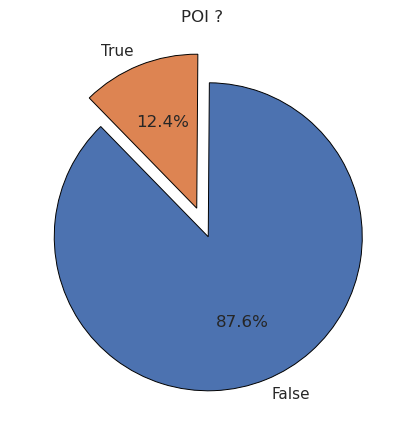

In [55]:
df["poi"].value_counts().plot.pie(explode=[0.1, 0.1], wedgeprops={'linewidth': .7, 'edgecolor': 'black'}, startangle=134.28, autopct='%1.1f%%').set(title='POI ?', ylabel='')

_____________________________________________________________

# Análise multivariada de dados

##### O heatmap pode ser utilizado para analisar __padrões__, revelar __correlações__ e mostrar __tendencias__ em um grupo de dados. A visualização é facilitada por uma matriz que representa alta correlação __positiva__ ou __negativa__ através de um __espectro__ de cores:

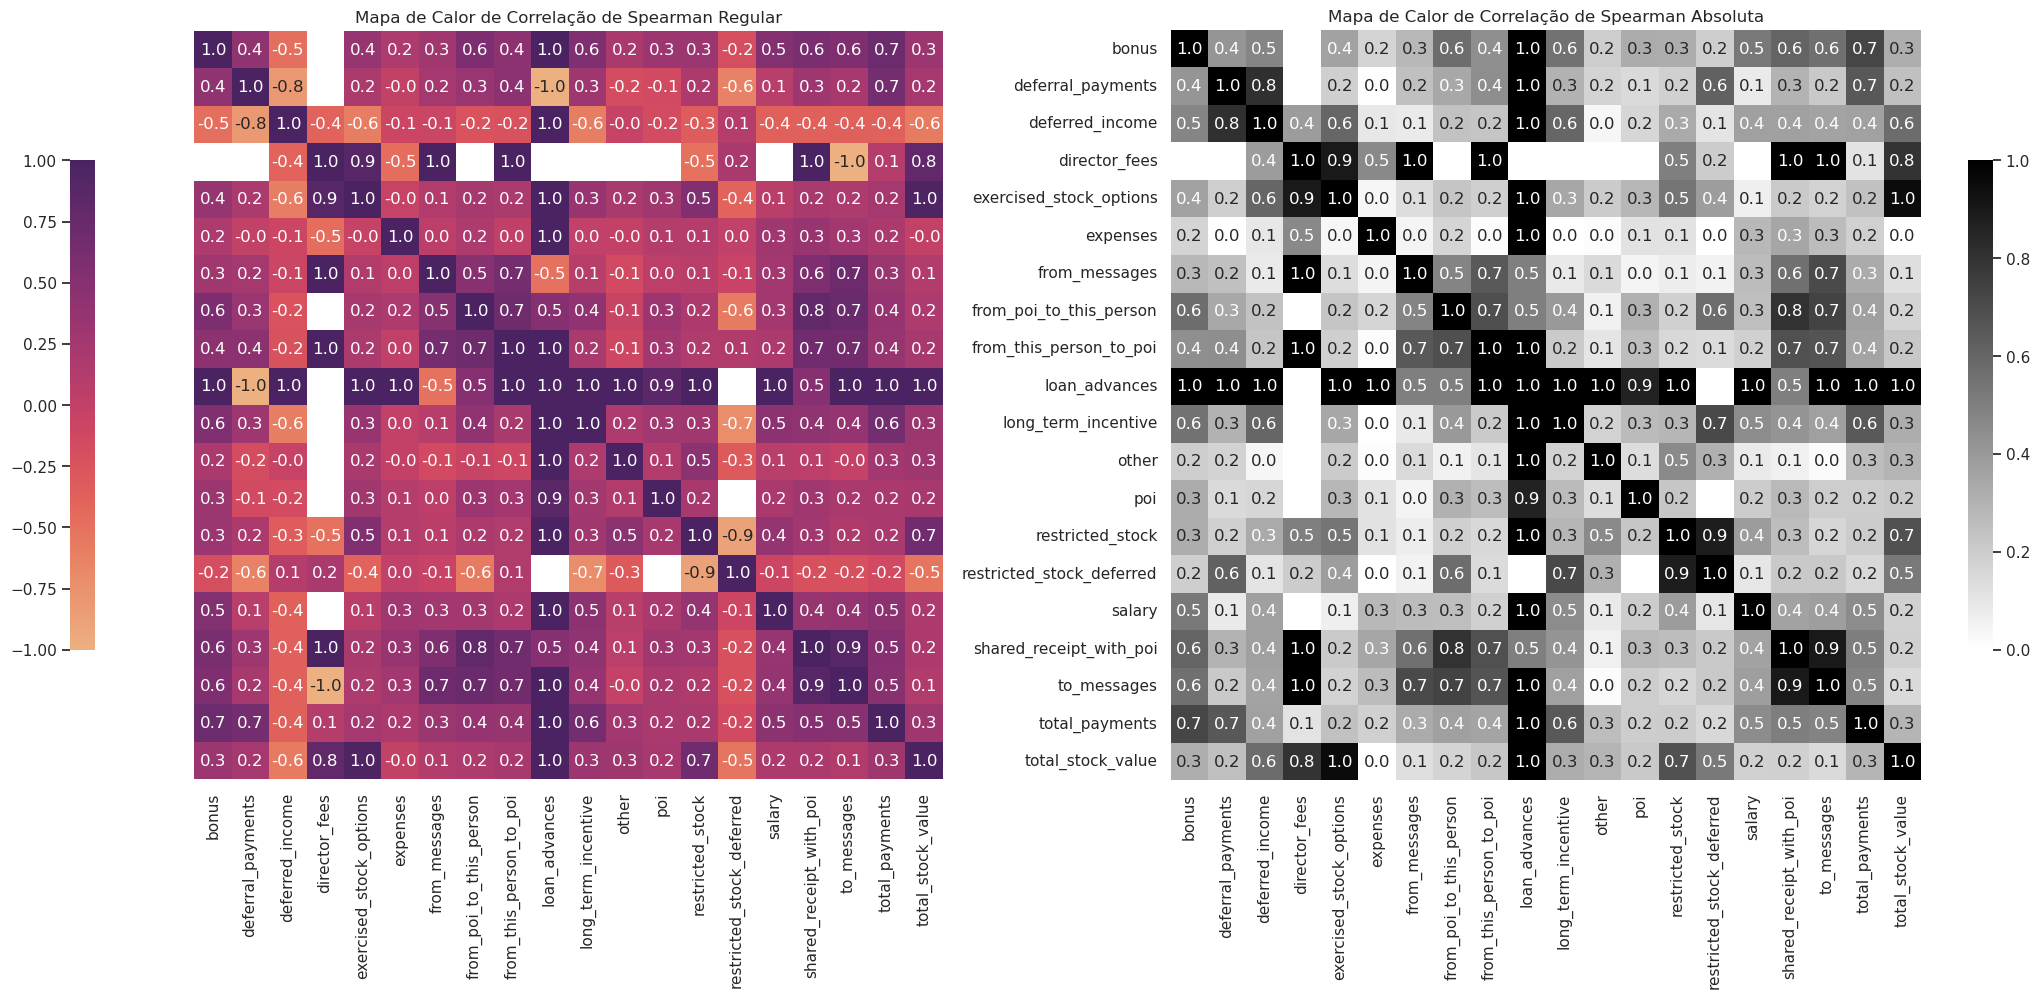

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(22,11), gridspec_kw={'width_ratios': [1, .94]})

sns.heatmap(df.corr(method='spearman'), ax=axs[0], annot=True, fmt='.1f', cmap='flare', cbar_kws={"shrink": .5, "location": 'left'}, square=True)
axs[0].set_title('Mapa de Calor de Correlação de Spearman Regular')
axs[0].set_yticklabels([])

sns.heatmap(df.corr(method='spearman').abs(), ax=axs[1], annot=True, fmt='.1f', vmin=0, cmap='binary', cbar_kws={"shrink": .5, "location": 'right'}, square=True)
axs[1].set_title('Mapa de Calor de Correlação de Spearman Absoluta')
axs[1].set_yticklabels(axs[1].get_yticklabels(), va= 'center')

plt.tight_layout()
plt.show()

##### No mapa de calor de correlação regular gerado, algumas variáveis se destacam:
1. Existem duas variáveis, deferral_payments e restricted_stock_deferred, no qual possuem correlação __negativa__ com praticamente todas as demais. As duas tem valores que tendem a diminuir quando o valor de outra variável sobe;
2. Existem duas variáveis, director_fees e loan_advances, no qual possuem correlação __positiva__ com a maioria das demais. As duas tem valores que tendem a subir quando o valor de outra variável diminui;
3. Existem instancias com baixa correlação linear (±0) com a maioria das demais, porém correlação inteiramente positiva (1) com algumas. Isso pode demonstrar alguma característica __específica__ destas variáveis.

##### No mapa de calor de correlação absoluta:
4. Existem diferentes aglomerados com ênfase na magnitude da correlação;
5. É possível interpretar a existência de correlações com mais simplicidade.

##### Para conseguirmos visualizar, descobrir e posteriormente entender relações e/ou correlações entre os dados presentes no dataframe da Enron com maior profundidade, devemos ampliar nossa análise para o nível __multivariado__.

#### 1. Poderiam os dados sobre as trocas de e-mail nos mostrar correlações uteis para solidificarmos a conclusão de participação de POIs na fraude?

##### Ao analisar o número de e-mails enviados para POIs e recebidos de POIs de cada indivíduo, verificamos que não participantes na fraude trocam e-mail com POIs de forma reciproca. Já participantes, recebem mais e-mails de POIs do que os enviam. Salve um indivíduo que, inversamente, envia mais do que recebe. Isso pode ser a amostra de que há um indivíduo central informante.

Text(0.5, 1.0, 'To POI vs. From POI')

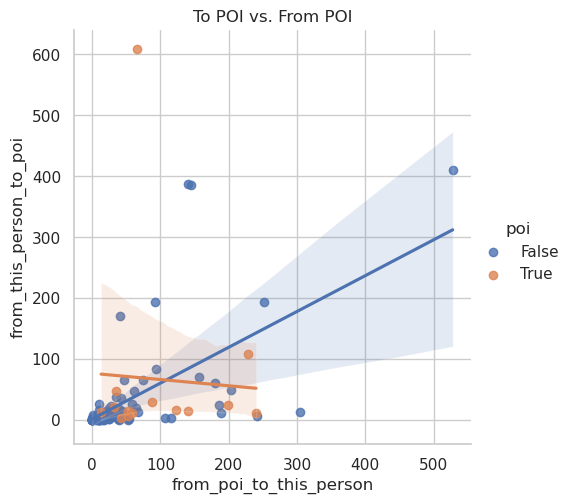

In [57]:
sns.set_style('whitegrid')
sns.lmplot(data=df,x='from_poi_to_this_person', y='from_this_person_to_poi', hue="poi")
ax = plt.gca()
ax.set_title('To POI vs. From POI')

##### Os gráficos a seguir demonstram correlação entre o habito de utilização da ferramenta com a frequência de comunicação com POIs. Como se existisse um fluxo de comunicação isolado e discreto.

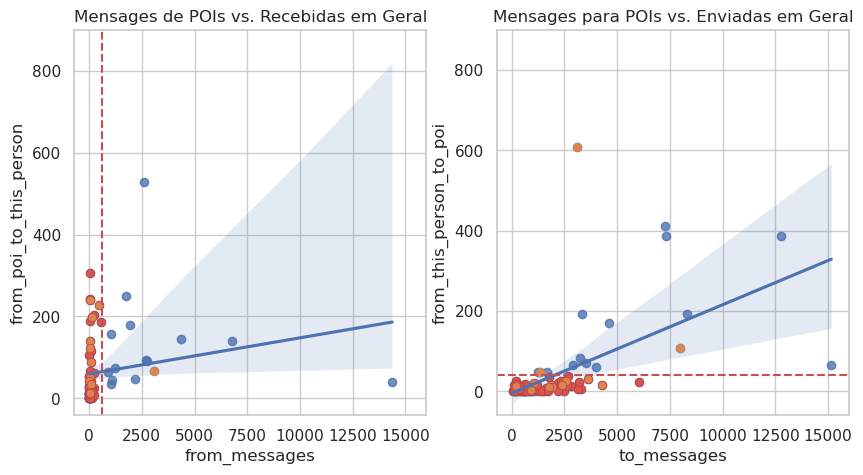

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.regplot(data=df, x='from_messages', y='from_poi_to_this_person', ax=axs[0])
sns.scatterplot(data=df[df['from_messages'] < df['from_messages'].mean()], x='from_messages', y='from_poi_to_this_person', ax=axs[0], color='#d9534f', edgecolor='#ba3d39')
sns.scatterplot(data=df[df['poi'] == True], x='from_messages', y='from_poi_to_this_person', ax=axs[0], color='#DD8452', edgecolor='#DD8452')
sns.scatterplot(data=df[(df['poi'] == True) & (df['from_messages'] < df['from_messages'].mean())], x='from_messages', y='from_poi_to_this_person', ax=axs[0], color='#DD8452', edgecolor='#ba3d39')
axs[0].set_title('Mensages de POIs vs. Recebidas em Geral')
axs[0].set(ylim=(None, 900))
axs[0].set(xlim=(None, 16000))
axs[0].axvline(x=df['from_messages'].mean(), color='r', linestyle='--')

sns.regplot(data=df, x='to_messages', y='from_this_person_to_poi', ax=axs[1])
sns.scatterplot(data=df[df['from_this_person_to_poi'] < df['from_this_person_to_poi'].mean()], x='to_messages', y='from_this_person_to_poi', ax=axs[1], color='#d9534f', edgecolor='#ba3d39')
sns.scatterplot(data=df[df['poi'] == True], x='to_messages', y='from_this_person_to_poi', ax=axs[1], color='#DD8452',edgecolor='#DD8452')
sns.scatterplot(data=df[(df['poi'] == True) & (df['from_this_person_to_poi'] < df['from_this_person_to_poi'].mean())], x='to_messages', y='from_this_person_to_poi', ax=axs[1], color='#DD8452',edgecolor='#ba3d39')
axs[1].set_title('Mensages para POIs vs. Enviadas em Geral')
axs[1].set(ylim=(None, 900))
axs[1].set(xlim=(None, 16000))
axs[1].axhline(y=df['from_this_person_to_poi'].mean(), color='r', linestyle='--')

plt.show()

##### Ao verificar relações entre:
1. Quantia de e-mails recebidos em geral com recebidos de POIs;
2. Quantia de e-mails enviados em geral com enviados para POIs.

##### Em contraste com a média, concluímos que:
1. Quanto menos e-mails cada funcionário recebe, mais e-mails de POIs recebem;
2. Quanto mais e-mails cada funcionário envia, menos e-mails envia para POIs.

##### Certamente, acontecem correlações entre dados sobre e-mails nas quais segregam POIs e não-POIs. Porém, a quantia de dados disponíveis para essas variáveis pode não ser ideal para tomar estas correlações como conclusivas.

#### 2. Como seria a relação entre o salário-base de um funcionário e os gastos da empresa com esse funcionário?

##### Para lidarmos com o problema dos outliers, estaremos utilizando salários de no máximo o dobro da média salarial.

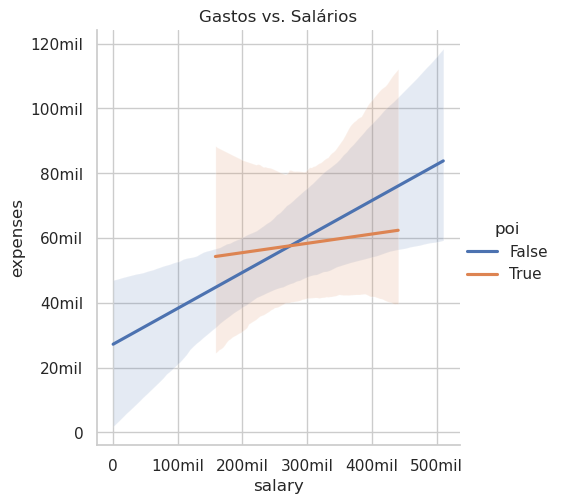

In [59]:
sns.lmplot(data=df[df['salary'] < df['salary'].mean()*2], x='salary', y='expenses', hue='poi', scatter=False)
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,10))
ax = plt.gca()
ax.set_title("Gastos vs. Salários")
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

##### Verificamos que existe um padrão de que quanto maior o salário do funcionário, mais gastos a empresa tem com ele em viagens a trabalho, almoços de negócio, transporte etc. Porém, ao compararmos essa relação, separando POIs e não POIs, verificamos que a correlação dos POIs é menor. A empresa gasta menos com eles ao crescer de seus salários.

#### 3. Existe alguma informação que entregue que a possível razão destes funcionários gastarem menos ser que eles já possuem outros privilégios?

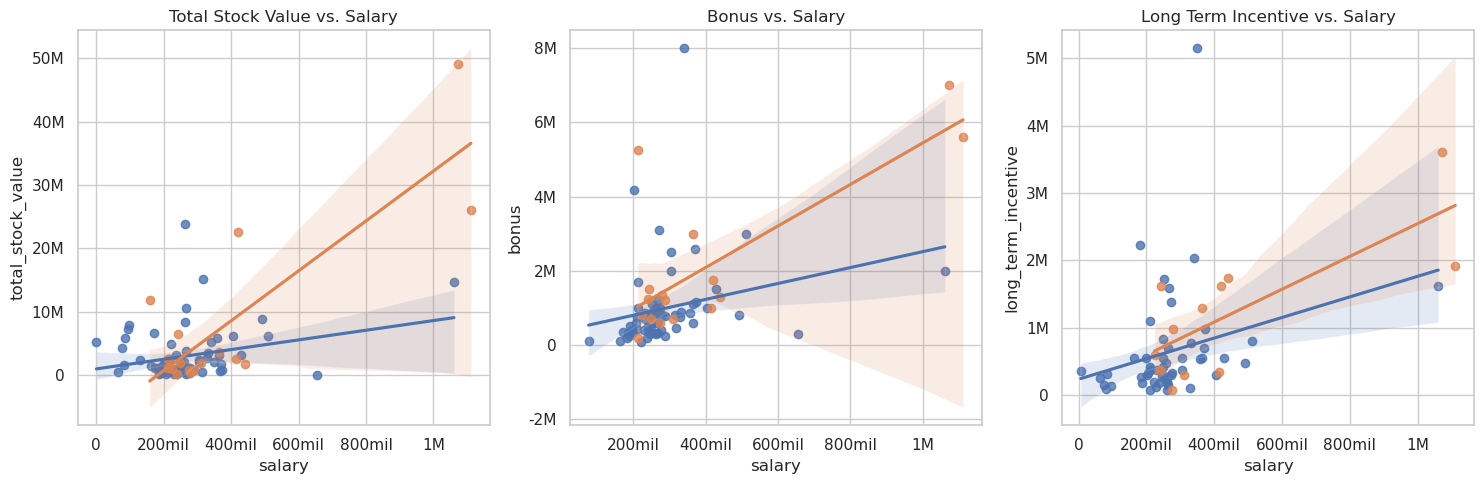

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

ys = ['total_stock_value', 'bonus', 'long_term_incentive']
titles = ['Total Stock Value', 'Bonus', 'Long Term Incentive']

for axs, ys, titles in zip(axs, ys, titles):
    sns.regplot(data=df[df['poi'] == False], x='salary', y=ys, ax=axs)
    sns.regplot(data=df[df['poi'] == True], x='salary', y=ys, ax=axs, color='#DD8452')
    axs.yaxis.set_major_formatter(formatter)
    axs.xaxis.set_major_formatter(formatter)
    axs.set_title(titles +' vs. Salary')

plt.tight_layout()
plt.show()

##### Acima, comparamos a correlação salário-ações, salário-bônus, salário-incentivo, entre POIs(laranja) e não-POIs(azul). Verificamos que POIs possuem em média mais __ações__ , recebem mais __bônus__ e recebem mais __incentivo__ na empresa em comparação com um não-POI de mesmo salário.

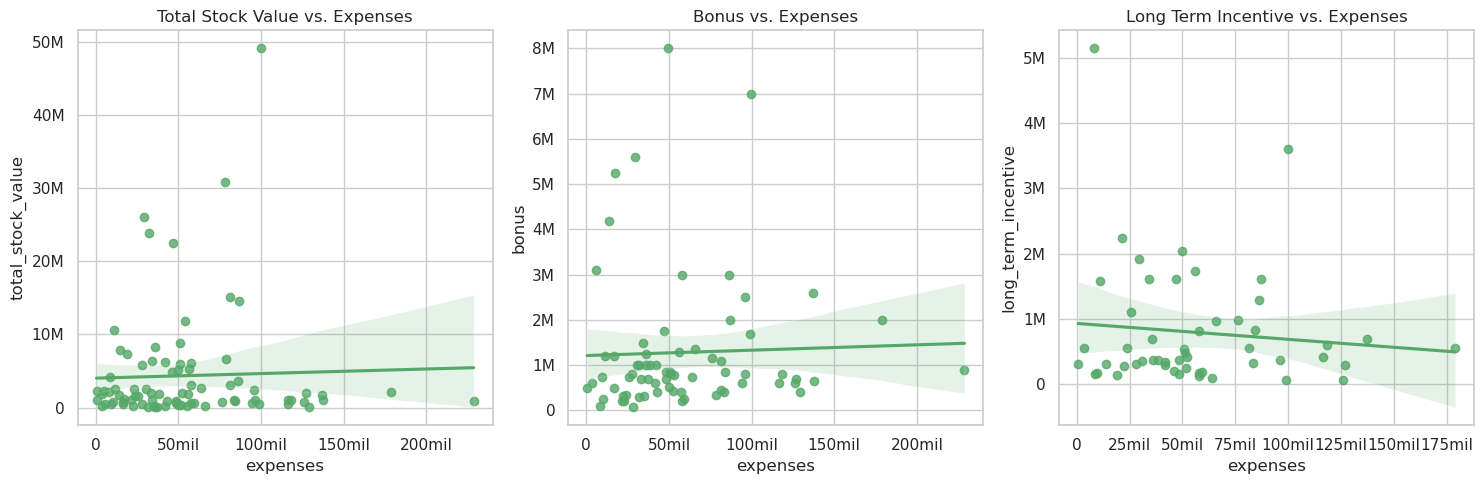

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

ys = ['total_stock_value', 'bonus', 'long_term_incentive']
titles = ['Total Stock Value', 'Bonus', 'Long Term Incentive']

for axs, ys, titles in zip(axs, ys, titles):
    sns.regplot(data=df, x='expenses', y=ys, ax=axs, color='g')
    axs.yaxis.set_major_formatter(formatter)
    axs.xaxis.set_major_formatter(formatter)
    axs.set_title(titles +' vs. Expenses')

plt.tight_layout()
plt.show()

##### Anteriormente comparamos salário com gastos e verificamos que total_stock_value, bonus e long_term_incentive possuem correlação positiva com salário

##### Acima, em verde, vemos total_stock_value, bonus e long_term_incentive não possuem correlação muito mais sutil ou até negativa com gastos

##### Funcionários gastam mais, possuem mais ações, ganham mais bônus e ganham mais incentivo conforme seus salários crescem. Porém, POIs gastam menos e ganham mais bônus, incentivos e possuem mais ações.

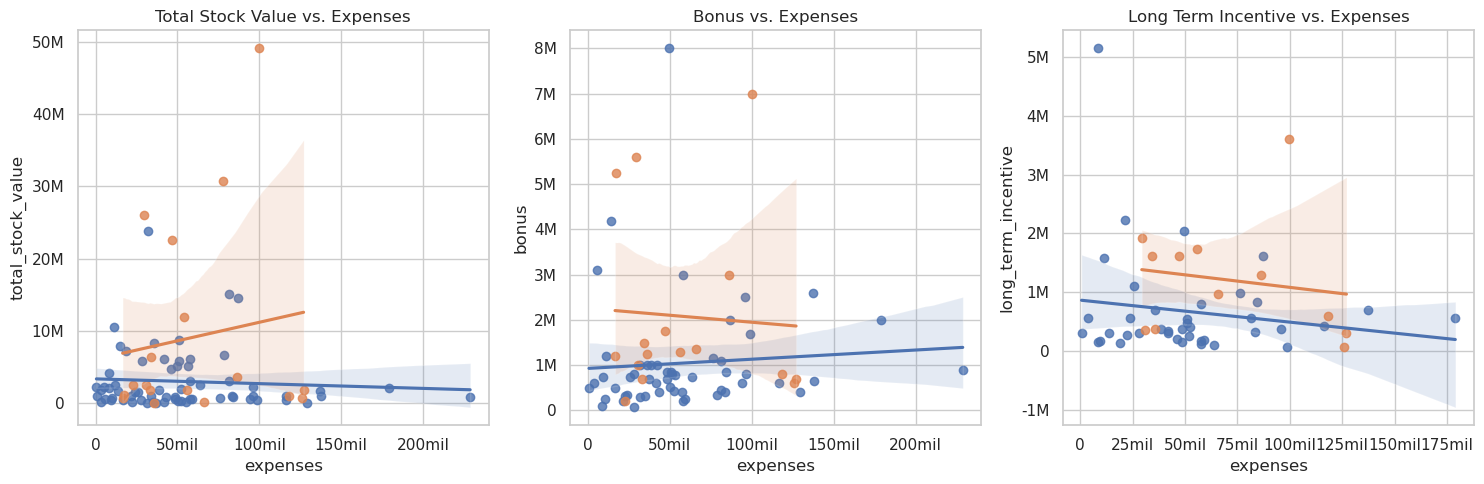

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

ys = ['total_stock_value', 'bonus', 'long_term_incentive']
titles = ['Total Stock Value', 'Bonus', 'Long Term Incentive']

for axs, ys, titles in zip(axs, ys, titles):
    sns.regplot(data=df[df['poi'] == False], x='expenses', y=ys, ax=axs)
    sns.regplot(data=df[df['poi'] == True], x='expenses', y=ys, ax=axs, color='#DD8452')
    axs.yaxis.set_major_formatter(formatter)
    axs.xaxis.set_major_formatter(formatter)
    axs.set_title(titles +' vs. Expenses')

plt.tight_layout()
plt.show()

##### Segregando POIs vemos que existe pouca diferença entre correlação com gastos, simplesmente confirmamos que eles possuem privilégios milionários em relação a funcionários não culpados.

##### Previamente, fizemos análises de variáveis com potencial de correlação devida à natureza de seus valores.

#### 4. Payments e Total Stock Value são as variáveis numéricas disponíveis com maior taxa de preenchimento respectivamente 85.6% e 86.3% dos funcionários possuem estes dados informados. Poderiam elas demonstrar alguma tendencia que as variáveis anteriores de menor taxa de preenchimento não nos mostrou?

##### A seguir, podemos visualizar pagamentos e valor total de ações dentro de suas respectivas médias. Percebemos quartis levemente similares:

Text(0.5, 1.0, 'TOTAL STOCK VALUE')

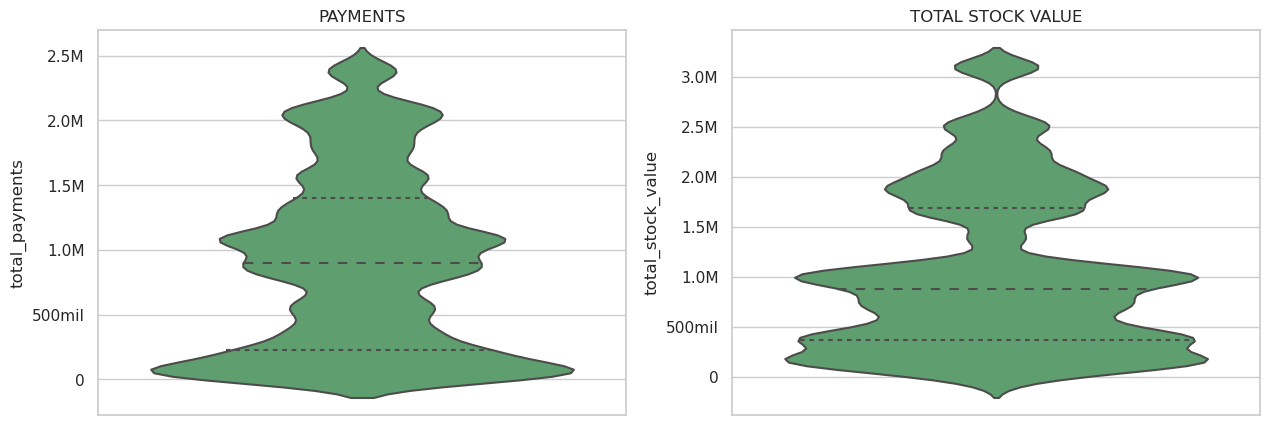

In [63]:
def formatador2(x, pos):
    if x == 0:
        return f'{x:.0f}'
    elif -1000 < x < 1000 :
        return f'{x:.0f}'
    elif -1e6 < x < 1e6 :
        return f'{x/1000:.0f}mil'
    elif -1e7 < x < 1e7:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e6:.0f}M'

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(data=df[df['total_payments'] < df['total_payments'].mean()], y='total_payments', inner='quarter', bw=.1, ax=axs[0], color='g')
axs[0].yaxis.set_major_formatter(mtick.FuncFormatter(formatador2))
axs[0].set_title('PAYMENTS')

sns.violinplot(data=df[df['total_stock_value'] < df['total_stock_value'].mean()], y='total_stock_value', inner='quarter', bw=.1, ax=axs[1], color='g')
axs[1].yaxis.set_major_formatter(mtick.FuncFormatter(formatador2))
axs[1].set_title('TOTAL STOCK VALUE')

##### Em verde, temos os valores totais sem segregação de POIs, contrastar os valores dentro da média das variáveis nos mostra certa similaridade.

##### Ao separarmos as listas entre POIs e não-POIs, observando a quantia total de valores, verificamos simetria e proporcionalidade entre as variáveis e a separação de POIs e não POIs:

Text(0.5, 1.0, 'TOTAL STOCK VALUE')

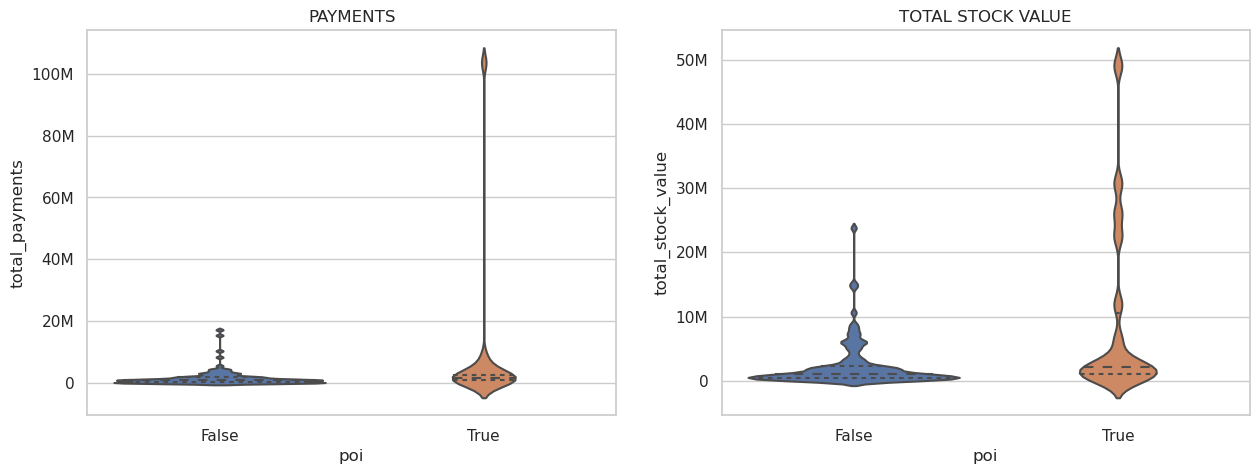

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(data=df, x='poi', y='total_payments', inner='quartil', bw=.1, ax=axs[0])
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_title('PAYMENTS')

sns.violinplot(data=df, x='poi', y='total_stock_value', inner='quartil', bw=.1, ax=axs[1])
axs[1].yaxis.set_major_formatter(formatter)
axs[1].set_title('TOTAL STOCK VALUE')


Text(0.5, 1.0, 'DEFERRAL PAYMENTS: FALSE (Azul) / TRUE (Laranja)')

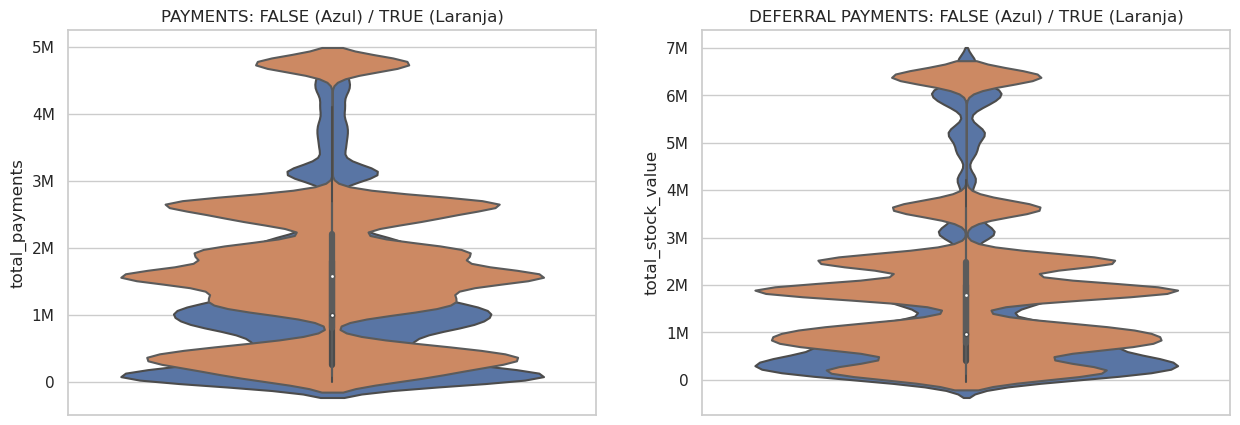

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(data=df[(df['poi'] == False) & (df['total_payments'] < df['total_payments'].mean() * 2)], y='total_payments', bw=.1, ax=axs[0])
sns.violinplot(data=df[(df['poi']==True) & (df['total_payments'] < df['total_payments'].mean()*2)], y='total_payments', bw=.1, ax=axs[0], color='#DD8452')
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_title('PAYMENTS: FALSE (Azul) / TRUE (Laranja)')

sns.violinplot(data=df[(df['poi']==False) & (df['total_stock_value'] < df['total_stock_value'].mean()*2)], y='total_stock_value', bw=.1, ax=axs[1])
sns.violinplot(data=df[(df['poi']==True) & (df['total_stock_value'] < df['total_stock_value'].mean()*2)], y='total_stock_value', bw=.1, ax=axs[1], color='#DD8452')
axs[1].yaxis.set_major_formatter(formatter)
axs[1].set_title('DEFERRAL PAYMENTS: FALSE (Azul) / TRUE (Laranja)')

##### Estas variáveis se comportam de maneira mais similar. 

#### 5. É possível dizer que variáveis com maior taxa de preenchimento possuam menos correlação?
##### Vamos verificar um heatmap de correlação de spearman absoluta que apresente somente variáveis com mais de 70% de preenchimento:

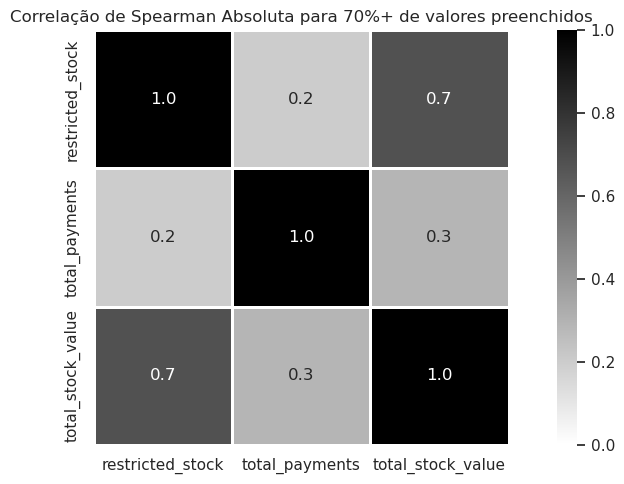

In [66]:
mod_df = df.dropna(axis=1, thresh=int((.7)*df.shape[0] + 1))
mod_df = mod_df.drop(['poi'], axis=1)

plt.figure(figsize=(10,5))
sns.heatmap(mod_df.corr(method='spearman').abs(), annot=True, fmt='.1f', cmap='binary', vmin=0, cbar_kws={"shrink": 1, "location": 'right'}, square=True, linewidths=1, linecolor='white').set_title(
    'Correlação de Spearman Absoluta para 70%+ de valores preenchidos')

plt.tight_layout()
plt.show()

##### Podemos ver que somente 3 variáveis numéricas apresentam mais de 70% de preenchimento. restricted_stock e total_stock_value, ambos relacionados a ações, possuem alta correlação:

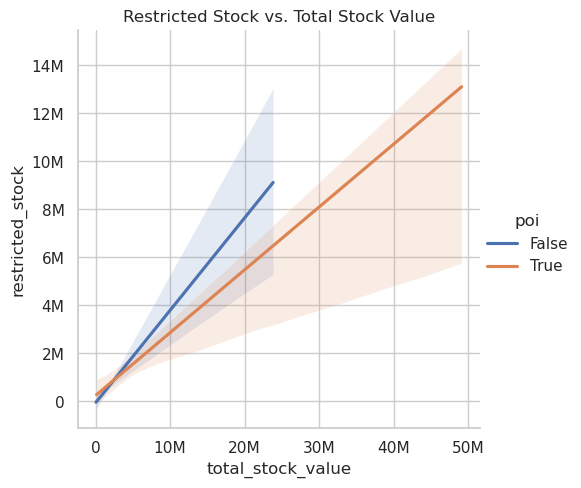

In [67]:
sns.lmplot(data=df, x='total_stock_value', y='restricted_stock', hue='poi', scatter=False)
ax = plt.gca()
ax.set_title("Restricted Stock vs. Total Stock Value")
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

##### Novamente, observamos um benefício em fazer parte do esquema, POIs possuem menos ações restritas por valor total de ações.

_____________________________________________________________

# Conclusão


## Reflexão

##### Durante o desenvolvimento deste projeto, a observação dos dados, efetuada de uma maneira progressiva, aprimorando visualizações a cada aprendizado, foi importante para atingir observações relevantes. Conceitos da linguagem Python previamente aprendidos, foram, neste trabalho, aprimorados e desafiados. Os resultados visuais e insights que as bibliotecas para criação de gráficos estatísticos oferecem, foram muito importantes para a solidificação da importância, através de resultados, da linguagem Python e desenvolvimento da vontade de continuar a aprender. Através do uso de análises multivariadas disponibilizadas pela linguagem de programação Python, e a visualização passo-a-passo oferecida pelos notebooks Jupyter, descobri formas de explicar observações complexas que possivelmente não seriam descobertas com tão facilidade. Em certos momentos, a dedicação com o projeto foi maior do que em outros momentos. Talvez, algumas etapas, receberam mais dedicação do que outras. Isso me faz refletir, não somente sobre a importância de cada etapa, mas sobre o que cada visualizador entende como uma observação interessante. Acredito que os hardskills utilizados no projeto são de grande importância. Porém, os softskills colocados em foco, ao partilhar, opinar e analisar outras opiniões, foram ótimos para expandir o leque de pontos a serem postos em consideração no momento de criação de projetos e trabalhos. Incorporar ideias de outros membros de equipe a um trabalho conjunto é importante para a maximização da possibilidade de o produto ser aceito por um grupo abrangente de pessoas. 

##### Acredito ter demonstrado efetivamente, boas visualizações, onde, padrões puderam ser facilmente visualizados. Criando observações e explicações pertinentes ao caso Enron e aos grupos de pessoas de interesse em foco. Estou certo de que trabalhos prévios efetuados por outros profissionais, foram muito importantes para a viabilização de meu sucesso neste projeto, como por exemplo, a sanitização de dados, organização de rótulos presentes no dataframe utilizado, ou até mesmo bibliotecas e plataformas utilizadas para efetuar minhas observações. Refletir na importância de fazer um bom trabalho e entender áreas onde melhoras poderiam terem sido feitas foi ótimo para crescimento pessoal, acadêmico e futuramente profissional. No contexto de um projeto de análise de dados, é evidente que buscar a excelência e reconhecer áreas que merecem melhorias é essencial para a entrega de insights e maximização do valor do projeto. Fazer um bom trabalho é importante pois reflete o comprometimento com a qualidade. Porém, reconhecer onde melhoras poderiam terem sido feitas, é igualmente importante. Possibilitando identificar fraquezas e desenvolver um comportamento de crescimento, continuamente melhorando skills e conhecimentos. 

##### Em conclusão, acreditar no valor de efetuar um trabalho de qualidade, nunca é demasiado. E, como em diversas áreas de atuação, um detalhe sempre poderá passar batido. Com observações alheias sobre meu projeto, ao invés de vê-las como indicações de insuficiência, melhores vistas como áreas de aprimoramento. Ter este tipo de pensamento impulsiona a busca por melhoria, constantemente maximizando o valor do resultado.

# Referências

https://en.wikipedia.org/wiki/Box_plot

https://en.wikipedia.org/wiki/Predictive_modelling

https://en.wikipedia.org/wiki/Random_forest

https://matplotlib.org/stable/tutorials/colors/colormaps.html

https://matplotlib.org/stable/tutorials/colors/colors.html

https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html

https://www.rgbtohex.net/

https://seaborn.pydata.org/examples/index.html

https://seaborn.pydata.org/generated/seaborn.violinplot.html

https://skytowner.com/explore/making_plots_side_by_side_in_matplotlib

https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot

https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi

https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels

https://stackoverflow.com/questions/69115477/how-can-i-order-alphabetically-a-list-in-plain-text-in-vs-code

https://stats.stackexchange.com/questions/11602/training-on-the-full-dataset-after-cross-validation#:~:text=So%20the%20answers%20to%20your%20question%20are%20%28i%29,statistic%20to%20further%20avoid%20over-fitting%20in%20model%20selection.

https://thispointer.com/pandas-drop-dataframe-columns-based-on-nan-percentage/

https://www.baeldung.com/cs/gradient-boosting-trees-vs-random-forests

https://www.statology.org/seaborn-subplots/


## Trabalhos futuros

##### 1. Como acadêmico de inteligência artificial, tenho grande interesse neste assunto, porém ainda pouco conhecimento. Vejo o estudo deste dasaset como um ótimo exemplo e um bom passo na direção correta. Com o intuito de praticar, já que esta base de dados não terá mais entradas. Após processar os dados e escolher partes relevantes, poderia estudar e desenvolver modelos preditivos, utilizando técnicas de machine learning, nas quais poderiam posteriormente serem utilizadas para análise comparativa com outras bases de dados. Utilizando algoritmos de machine learning apropriados como, arvores de decisões para entender e, talvez, prever e adivinhar POIs, inspecionando nos e sub arvores. Imagino que cada variável tendencia o resultado da conclusão da categorização de pessoas de interesse de maneiras diferentes e com diferentes proporções. Pelo meu entendimento, estas arvores são instáveis, pequenas mudanças ou omissões de instancias, como ocorre neste dataset, pode resultar em resultados imprecisos. A exploração de modelos preditivos e arvores de decisões dentro desta base de dados, apresenta uma excelente oportunidade para aprofundamento na categorização de POIs usando machine learning. Perceber a instabilidade inerente das arvores de decisões é crucial para inspecionar a precisão e confiabilidade dos resultados dentro das limitações da base de dados.

##### 2. Além disso, estender a análise e incluir estudos comparativos com outros bancos de dados, agregara no entendimento da generalizabilidade de modelos e potenciais aplicações. Imagino que um modelo treinado nesta, e, em diferentes bases de dados, poderei avaliar a performance, diante diversos cenários e testar a habilidade de lidar com variações em distribuições de dados. Com isso identificar padrões que vão além de base de dados especificas, provendo novos insights sobre a solidez do modelo treinado e a validade dos resultados obtidos previamente, como por exemplo reconhecimento de padrões, analise de erros e analises de possíveis cenários.

##### 3. Pelo fato de que a base de dados não recebera mais valores, seria interessante aplicar pessoas fictícias para aumentar a quantia e diversidade dos dados, potencialmente melhorando a habilidade do modelo aprender e generalizar os cenários do mundo real. Também, valores fictícios direcionados a stress testing de comportamentos em cenários de piores casos, garantinndo melhor robustez na identificação de outliers e expor potenciais fraquezas e vulnerabilidades. No entanto, é importante mencionar que a falta de realismo desses valores fictícios pode prejudicar a representatividade do modelo, introduzindo viés por características artificiais. No entanto, ao compreender os vieses criados pelos valores fictícios e seus padrões por meio do conhecimento prévio, é possível identificar possíveis vieses e como eles influenciam o modelo.

##### Meu conhecimento sobre metodologias utilizadas de forma técnica nestes cenários ainda está em desenvolvimento, acredito que, assim como neste trabalho, seria importante cooperação de grupo com diferentes perfis analistas.